In [ ]:
import json

json_file_path = 'world_qs_rankings_dict_3.json'

with open(json_file_path, 'r') as file:
    data = json.load(file)

In [ ]:
country_number_of_universites = {}
country_iso_number_of_universites = {}
for university in data:
  if university['college_location_name'] in country_number_of_universites:
    temp = country_number_of_universites.get(university['college_location_name'])
    country_number_of_universites[university['college_location_name']] = temp+1
  else:
    country_number_of_universites[university['college_location_name']] = 1

In [ ]:
print(country_number_of_universites)

{'United Kingdom': 170, 'United States': 180, 'Switzerland': 14, 'China': 88, 'Singapore': 2, 'Canada': 31, 'Japan': 183, 'Germany': 53, 'Hong Kong': 6, 'Australia': 37, 'France': 49, 'Belgium': 10, 'Netherlands': 12, 'Sweden': 14, 'South Korea': 41, 'Denmark': 9, 'Austria': 13, 'Finland': 11, 'Norway': 7, 'Ireland': 9, 'New Zealand': 8, 'Spain': 60, 'Taiwan': 51, 'Italy': 59, 'South Africa': 14, 'Macao': 4, 'India': 128, 'Saudi Arabia': 32, 'Luxembourg': 2, 'Brazil': 69, 'Israel': 8, 'United Arab Emirates': 14, 'Malaysia': 27, 'Qatar': 1, 'Hungary': 13, 'Iran': 76, 'Estonia': 3, 'Turkey': 102, 'Brunei Darussalam': 2, 'Czech Republic': 21, 'Portugal': 17, 'Chile': 32, 'Pakistan': 94, 'Ukraine': 43, 'Lebanon': 6, 'Greece': 21, 'Cyprus': 4, 'Iceland': 2, 'Kazakhstan': 33, 'Ghana': 9, 'Thailand': 28, 'Vietnam': 7, 'Northern Cyprus': 5, 'Egypt': 38, 'Poland': 39, 'Jordan': 21, 'Mexico': 31, 'Oman': 5, 'Colombia': 41, 'Serbia': 4, 'Bangladesh': 21, 'Romania': 26, 'Nigeria': 47, 'Indonesia':

In [ ]:
!pip install pycountry
import pycountry

def country_to_iso_alpha3(country_name):
    try:
        country = pycountry.countries.lookup(country_name)
        return country.alpha_3
    except LookupError:
        return None

for country,number in country_number_of_universites.items():
  country_iso_number_of_universites[country_to_iso_alpha3(country)] = number

In [ ]:
print(country_iso_number_of_universites)

{'GBR': 170, 'USA': 180, 'CHE': 14, 'CHN': 88, 'SGP': 2, 'CAN': 31, 'JPN': 183, 'DEU': 53, 'HKG': 6, 'AUS': 37, 'FRA': 49, 'BEL': 10, 'NLD': 12, 'SWE': 14, 'KOR': 41, 'DNK': 9, 'AUT': 13, 'FIN': 11, 'NOR': 7, 'IRL': 9, 'NZL': 8, 'ESP': 60, 'TWN': 51, 'ITA': 59, 'ZAF': 14, 'MAC': 4, 'IND': 128, 'SAU': 32, 'LUX': 2, 'BRA': 69, 'ISR': 8, 'ARE': 14, 'MYS': 27, 'QAT': 1, 'HUN': 13, 'IRN': 76, 'EST': 3, None: 2, 'BRN': 2, 'CZE': 21, 'PRT': 17, 'CHL': 32, 'PAK': 94, 'UKR': 43, 'LBN': 6, 'GRC': 21, 'CYP': 4, 'ISL': 2, 'KAZ': 33, 'GHA': 9, 'THA': 28, 'VNM': 7, 'EGY': 38, 'POL': 39, 'JOR': 21, 'MEX': 31, 'OMN': 5, 'COL': 41, 'SRB': 4, 'BGD': 21, 'ROU': 26, 'NGA': 47, 'IDN': 39, 'LTU': 5, 'SVN': 5, 'UGA': 2, 'MLT': 1, 'IRQ': 64, 'TUN': 11, 'PHL': 15, 'LKA': 7, 'SVK': 8, 'DZA': 90, 'ETH': 2, 'KWT': 3, 'LVA': 4, 'TZA': 2, 'PER': 10, 'ECU': 17, 'MAR': 16, 'FJI': 1, 'JAM': 1, 'HRV': 5, 'BWA': 2, 'CRI': 3, 'MOZ': 1, 'GEO': 8, 'MUS': 1, 'BGR': 5, 'KEN': 5, 'NAM': 1, 'PRI': 1, 'NPL': 1, 'ZMB': 2, 'ZWE':

In [ ]:
import geopandas as gpd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import plot

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world['Universities'] = world['iso_a3'].map(country_iso_number_of_universites)

fig = make_subplots(rows=1, cols=1,
                    specs=[[{'type': 'scattergeo'}]])

fig.add_trace(
    go.Choropleth(
        locations=world['iso_a3'],
        z=world['Universities'],
        text=world['name'],
        colorscale='Blues',
        marker_line_color='black',
        colorbar_title='Number of Universities',
    ),
)

fig.update_layout(width=1000,height=600)
fig.show()
plot(fig, filename='hotspots.html')


<ipython-input-6-e98c9ff5ca0f>:6: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



'hotspots.html'

In [ ]:
import pandas as pd
countries = set()
df = pd.DataFrame()

for dict in data:
  if dict['college_location_name'] not in countries:
    df = df.append({'country': dict['college_location_name'], 'gdp': dict['country_annual_gdp'], 'unemployment': dict['country_unemployment'], 'population': dict['country_population']}, ignore_index=True)
    countries.add(dict['college_location_name'])


In [ ]:
def percent_to_float(percent_str):
    if percent_str != 'Data not available':
      number_str = percent_str.replace('%', '')
      number_float = float(number_str)
      return number_float / 100

In [ ]:
df['gdp'] = df['gdp'].apply(percent_to_float)
df['unemployment'] = df['unemployment'].apply(percent_to_float)

In [ ]:
def remove_commas_and_convert_to_int(x):
    if x != 'Data not available':
      return int(x.replace(',', ''))

In [ ]:
df['population'] = df['population'].apply(remove_commas_and_convert_to_int)
df['population'] = df['population'].fillna(0)

In [ ]:
print(df.head)

<bound method NDFrame.head of                 country     gdp  unemployment    population
0        United Kingdom  0.0435        0.0373  6.697140e+07
1         United States  0.0194        0.0365  3.332876e+08
2           Switzerland  0.0257        0.0430  8.775760e+06
3                 China  0.0299        0.0498  1.412175e+09
4             Singapore  0.0365        0.0359  5.637022e+06
..                  ...     ...           ...           ...
120             Uruguay  0.0492        0.0787  3.422794e+06
121            Cambodia  0.0524        0.0023  1.676784e+07
122              Angola  0.0305        0.1448  3.558899e+07
123             Moldova -0.0502        0.0091  2.538894e+06
124  Dominican Republic  0.0486        0.0550  1.122882e+07

[125 rows x 4 columns]>


In [ ]:
!pip install mplcursors

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import mplcursors

bubble_sizes = df['population']

fig = px.scatter(df, x='gdp', y='unemployment', size=bubble_sizes, hover_name='country',
                 labels={'gdp': 'GDP', 'unemployment': 'Unemployment Rate (%)','population':'Population'},
                 title='GDP, Unemployment Rate, and Population')

fig.update_layout(width=800, height=600, showlegend=False)

fig.show()
fig.write_html("bubble_plot.html")

In [ ]:
def filter(gre,toefl,gpa):
  filtered_data = []
  for dict in data:
    flag=0
    if dict['college_gpa'] is not None and dict['college_gpa'] != '' and dict['college_gpa'] != 'null' and dict['college_gpa'] != '+':
      temp1 = dict['college_gpa'].replace('+', '')
      temp2 = float(temp1)
      if temp2 <= gpa:
        flag+=1

    if dict['college_gre'] is not None and dict['college_gre'] != '' and dict['college_gre'] != 'null' and dict['college_gre'] != '+':
      temp1 = dict['college_gre'].replace('+', '')
      temp2 = float(temp1)
      if temp2 <= gre:
        flag+=1

    if dict['college_toefl'] is not None and dict['college_toefl'] != '' and dict['college_toefl'] != 'null' and dict['college_toefl'] != '+':
      temp1 = dict['college_toefl'].replace('+', '')
      temp2 = float(temp1)
      if temp2 <= toefl:
        flag+=1

    if flag==3:
      filtered_data.append(dict)

  return filtered_data

score_df = pd.DataFrame()

In [ ]:
!pip install qgrid

In [ ]:
import ipywidgets as widgets
from IPython.display import display
from tabulate import tabulate

def filter(gre,toefl,gpa):
  filtered_data = []
  for dict in data:
    flag=0
    if dict['college_gpa'] is not None and dict['college_gpa'] != '' and dict['college_gpa'] != 'null' and dict['college_gpa'] != '+':
      temp1 = dict['college_gpa'].replace('+', '')
      temp2 = float(temp1)
      if temp2 <= gpa:
        flag+=1

    if dict['college_gre'] is not None and dict['college_gre'] != '' and dict['college_gre'] != 'null' and dict['college_gre'] != '+':
      temp1 = dict['college_gre'].replace('+', '')
      temp2 = float(temp1)
      if temp2 <= gre:
        flag+=1

    if dict['college_toefl'] is not None and dict['college_toefl'] != '' and dict['college_toefl'] != 'null' and dict['college_toefl'] != '+':
      temp1 = dict['college_toefl'].replace('+', '')
      temp2 = float(temp1)
      if temp2 <= toefl:
        flag+=1

    if flag==3:
      filtered_data.append(dict)

  return filtered_data
# Create sliders
slider_gre = widgets.FloatSlider(value=0, min=260, max=340, step=1, description='GRE:', layout=widgets.Layout(width='50%'))
slider_toefl = widgets.FloatSlider(value=0, min=70, max=120, step=1, description='TOEFL:', layout=widgets.Layout(width='50%'))
slider_gpa = widgets.FloatSlider(value=0, min=0, max=4, step=0.1, description='GPA:', layout=widgets.Layout(width='50%'))

# Output label
output_label = widgets.Output()

# Link sliders to the function
def update_output(change):
    with output_label:
        output_label.clear_output()
        filtered_data = filter(slider_gre.value, slider_toefl.value, slider_gpa.value)
        score_df = pd.DataFrame()
        score_df = pd.concat([score_df, pd.DataFrame(filtered_data)], ignore_index=True)
        if score_df.empty:
          print("No University exist with this scores!")
        else:
          selected_columns = score_df[['college_title', 'college_location_name', 'college_number_of_students_per_staff','college_international_students']]
          print(tabulate(selected_columns, headers='keys', tablefmt='fancy_grid'))

slider_gre.observe(update_output, 'value')
slider_toefl.observe(update_output, 'value')
slider_gpa.observe(update_output, 'value')

# Display widgets
display(widgets.VBox([slider_gre, slider_toefl, slider_gpa, output_label]))

In [ ]:
for dict in data[0:20]:
  dict['college_number_of_students_per_staff'] = float(dict['college_number_of_students_per_staff'])
  dict['college_international_students'] = dict['college_international_students'].replace('%','')
  dict['college_international_students'] = float(dict['college_international_students'])
  dict['college_inter_science_research'] = dict['college_inter_science_research'].replace('%','')
  dict['college_inter_science_research'] = float(dict['college_inter_science_research'])
  if dict['college_female_male_ratio'] != 'n/a':
    dict['female_percentage'] = int(dict['college_female_male_ratio'].split(':')[0])
    dict['male_percentage'] = int(dict['college_female_male_ratio'].split(':')[1])
  else:
    dict['female_percentage'] = 0
    dict['male_percentage'] = 0

selected_columns = ['college_title', 'college_number_of_students_per_staff', 'college_international_students', 'college_inter_science_research', 'female_percentage', 'male_percentage']

# Create DataFrame
df = pd.DataFrame(data[0:20])[selected_columns]

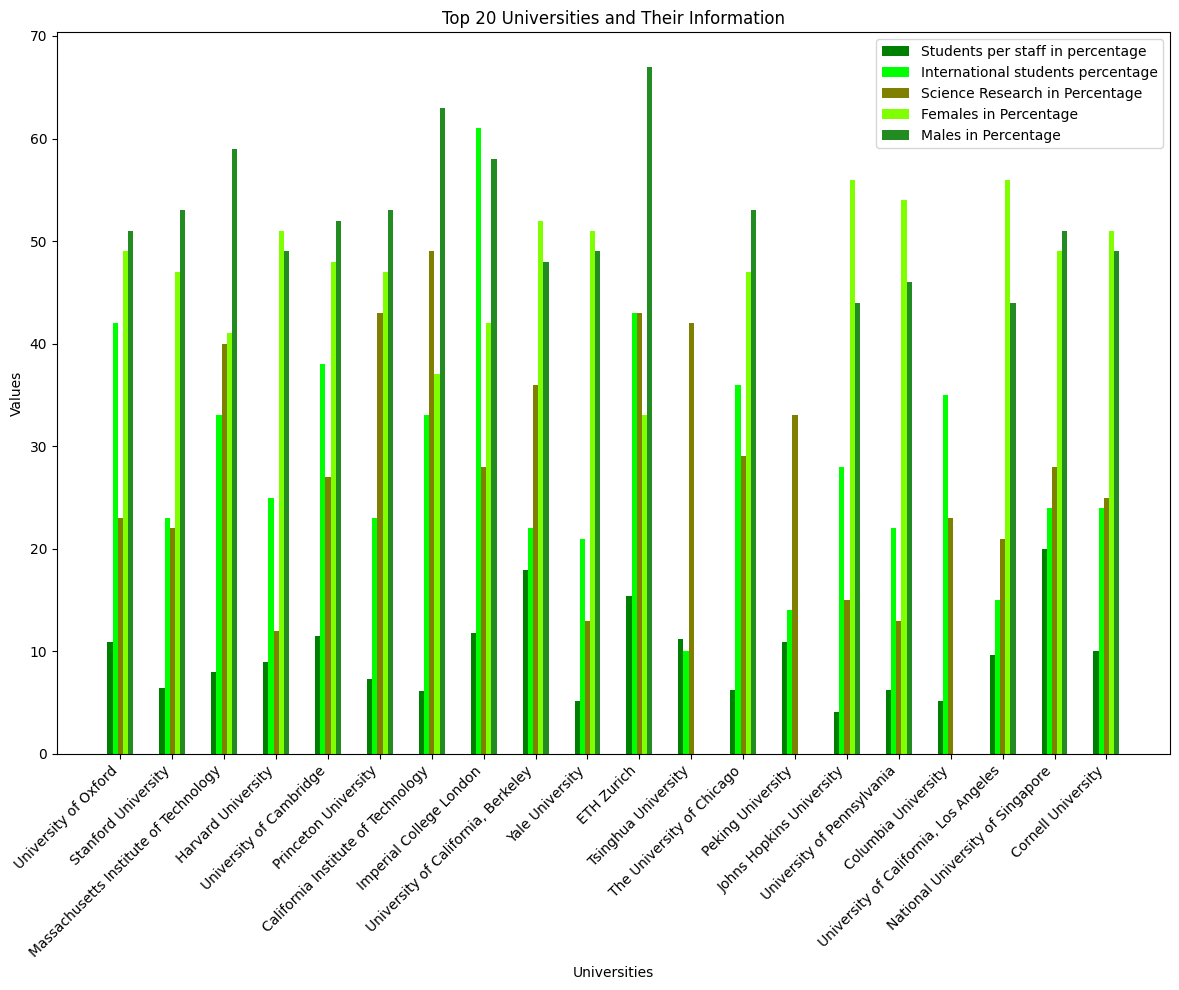

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as pio

# Plotting multiple fields for each university
fig, ax = plt.subplots(figsize=(12, 10))
bar_width = 0.1
index = df.index
offset = 0.3

bar1 = ax.bar(index - 2 * bar_width, df['college_number_of_students_per_staff'], bar_width, label='Students per staff in percentage', color='green')
bar2 = ax.bar(index - bar_width, df['college_international_students'], bar_width, label='International students percentage', color='lime')
bar3 = ax.bar(index, df['college_inter_science_research'], bar_width, label='Science Research in Percentage', color='olive')
bar4 = ax.bar(index + bar_width, df['female_percentage'], bar_width, label='Females in Percentage', color='Chartreuse')
bar5 = ax.bar(index + 2 * bar_width, df['male_percentage'], bar_width, label='Males in Percentage', color='ForestGreen')

ax.set_xlabel('Universities')
ax.set_ylabel('Values')
ax.set_title('Top 20 Universities and Their Information')
ax.set_xticks(index)
ax.set_xticklabels(df['college_title'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

# Create a Plotly figure
plotly_fig = go.Figure()

# Add bar traces to the Plotly figure
plotly_fig.add_trace(go.Bar(x=index - 2 * bar_width, y=df['college_number_of_students_per_staff'], name='Students per staff in percentage', marker_color='green'))
plotly_fig.add_trace(go.Bar(x=index - bar_width, y=df['college_international_students'], name='International students percentage', marker_color='lime'))
plotly_fig.add_trace(go.Bar(x=index, y=df['college_inter_science_research'], name='Science Research in Percentage', marker_color='olive'))
plotly_fig.add_trace(go.Bar(x=index + bar_width, y=df['female_percentage'], name='Females in Percentage', marker_color='Chartreuse'))
plotly_fig.add_trace(go.Bar(x=index + 2 * bar_width, y=df['male_percentage'], name='Males in Percentage', marker_color='ForestGreen'))

plotly_fig.update_layout(xaxis_title='Universities', yaxis_title='Values', title='Top 20 Universities and Their Information', xaxis_tickangle=-45)

# Save the Plotly figure as an HTML file
pio.write_html(plotly_fig, file='university_information.html')